### Demo with Interface

In [1]:
read_num = 100
filename = 'case.txt'
MAX_DOC_LEN = 100
from preprocess import read_text

doc_list,labels = read_text(filename,read_num,MAX_DOC_LEN)

FileNotFoundError: [Errno 2] No such file or directory: 'case.txt'

In [2]:
from preprocess import preprocess
word_list,word2idx,token_list = preprocess(doc_list)

max_pred = MAX_DOC_LEN // 2 + 8 # 最大预测词长度，需要padding和mask
maxlen = MAX_DOC_LEN // 2 + 8 # 输入文本的最大词长度，与padding相关
vocab_size = len(word2idx)

from preprocess import make_data
batch = make_data(doc_list,token_list,word2idx,labels,max_pred,maxlen)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.776 seconds.
Prefix dict has been built successfully.


In [5]:
from preprocess import dataloader
batch_size = 32

loader = dataloader(batch,batch_size)

In [6]:
import torch.nn as nn
import torch.optim as optim
from model import *

model = BERT(vocab_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(model.parameters(), lr=0.001)

from model import train
train(model,loader,30,criterion,optimizer)

In [8]:
from model import predict
    
predict(model,batch,0)

masked tokens list :  [3, 32, 39, 9, 24, 31]
predict masked tokens list :  [3, 27, 29, 25, 29, 1254]
label :  False
predict label :  False


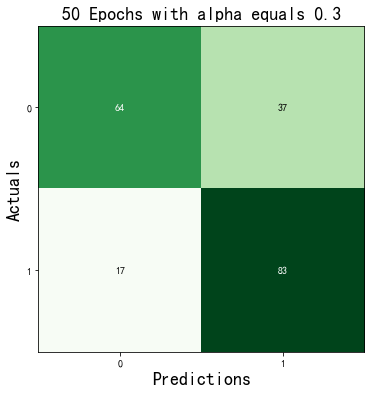

accuracy:73.134%


In [13]:
from model import accuracy
pred_labels,true_labels = accuracy(model,batch)

from model import cm_plot
cm_plot(pred_labels,true_labels)

#### abs sum weight

In [11]:
from model import cal_layer_weight

w_across_layers = cal_layer_weight(model)
w_across_layers

tensor([0.8335, 0.1133, 0.0532])

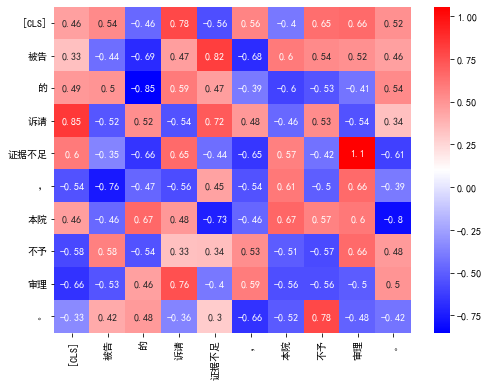

In [12]:
from model import attn_vis
example = '被告的诉请证据不足，本院不予审理。'        
attn_vis(model,example,w_across_layers,word2idx,pooling=True)